<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/Projek_quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Load data**

In [52]:
path_1 = "transaction_data.csv"
path_2 = "purchase_behaviour.csv"

In [60]:
df_transaction = pd.read_csv(path_1, on_bad_lines="warn")
df_behavior = pd.read_csv(path_2)

<ipython-input-60-e73770e30857>:1: ParserWarning: Skipping line 15596: expected 8 fields, saw 9
Skipping line 31206: expected 8 fields, saw 12

  df_transaction = pd.read_csv(path_1, on_bad_lines="warn")
<ipython-input-60-e73770e30857>:1: ParserWarning: Skipping line 78141: expected 8 fields, saw 9
Skipping line 109308: expected 8 fields, saw 10

  df_transaction = pd.read_csv(path_1, on_bad_lines="warn")
<ipython-input-60-e73770e30857>:1: ParserWarning: Skipping line 155951: expected 8 fields, saw 15

  df_transaction = pd.read_csv(path_1, on_bad_lines="warn")
<ipython-input-60-e73770e30857>:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction = pd.read_csv(path_1, on_bad_lines="warn")


In [63]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1.0,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348.0,66,CCs Nacho Cheese 175g,3.0,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [30]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# **Data Cleaning**

# **Data Transaction**

In [31]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171555 entries, 0 to 171554
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            171555 non-null  int64  
 1   STORE_NBR       171555 non-null  int64  
 2   LYLTY_CARD_NBR  171555 non-null  object 
 3   TXN_ID          171555 non-null  float64
 4   PROD_NBR        171554 non-null  object 
 5   PROD_NAME       171553 non-null  object 
 6   PROD_QTY        171552 non-null  float64
 7   TOT_SALES       171551 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.5+ MB


In [32]:
df_transaction.shape

(171555, 8)

In [35]:
df_transaction.shape

(171550, 8)

In [36]:
df_transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [37]:
df_transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1.0,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,43599,1,1307,348.0,66,CCs Nacho Cheese 175g,3.0,6.3
2,43605,1,1343,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,43329,2,2373,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,43330,2,2426,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8
5,43604,4,4074,2982.0,57,Old El Paso Salsa Dip Tomato Mild 300g,1.0,5.1
6,43601,4,4149,3333.0,16,Smiths Crinkle Chips Salt & Vinegar 330g,1.0,5.7
7,43601,4,4196,3539.0,24,Grain Waves Sweet Chilli 210g,1.0,3.6
8,43332,5,5026,4525.0,42,Doritos Corn Chip Mexican Jalapeno 150g,1.0,3.9
9,43330,7,7150,6900.0,52,Grain Waves Sour Cream&Chives 210G,2.0,7.2


In [62]:
# conversi column date
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], format='mixed')
df_transaction['DATE'].head()

,DATE
0,1970-01-01 00:00:00.000043390
1,1970-01-01 00:00:00.000043599
2,1970-01-01 00:00:00.000043605
3,1970-01-01 00:00:00.000043329
4,1970-01-01 00:00:00.000043330


In [59]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171555 entries, 0 to 171554
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   DATE            171555 non-null  datetime64[ns, UTC]
 1   STORE_NBR       171555 non-null  int64              
 2   LYLTY_CARD_NBR  171555 non-null  object             
 3   TXN_ID          171555 non-null  float64            
 4   PROD_NBR        171554 non-null  object             
 5   PROD_NAME       171553 non-null  object             
 6   PROD_QTY        171552 non-null  float64            
 7   TOT_SALES       171551 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 10.5+ MB


In [64]:
df_transaction.describe()

,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES
count,171555,171555.000000,1.715550e+05,171552.000000,171551.000000
mean,1970-01-01 00:00:00.000043463,130.420163,1.304001e+05,1.916403,7.340852
min,1970-01-01 00:00:00.000000433,1.000000,1.000000e+00,1.000000,1.500000
25%,1970-01-01 00:00:00.000043372,63.000000,6.102350e+04,2.000000,5.600000
50%,1970-01-01 00:00:00.000043463,125.000000,1.285210e+05,2.000000,7.400000
75%,1970-01-01 00:00:00.000043556,197.000000,1.974600e+05,2.000000,9.200000
max,1970-01-01 00:00:00.000043646,272.000000,2.415841e+06,200.000000,650.000000
std,NaN,76.884957,7.836217e+04,0.756138,3.343531


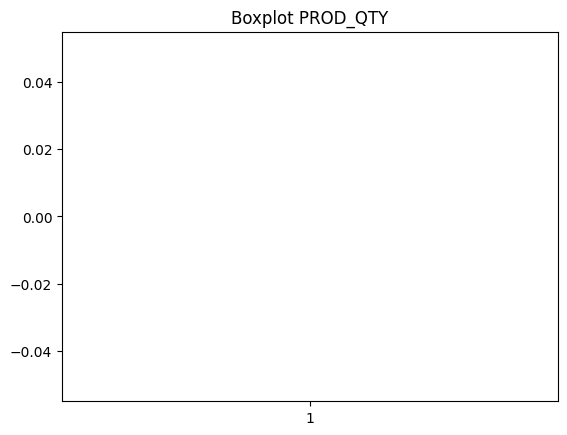

In [65]:
# visualisasi boxplot cek outlier
plt.boxplot(df_transaction['PROD_QTY'])
plt.title('Boxplot PROD_QTY')
plt.show()

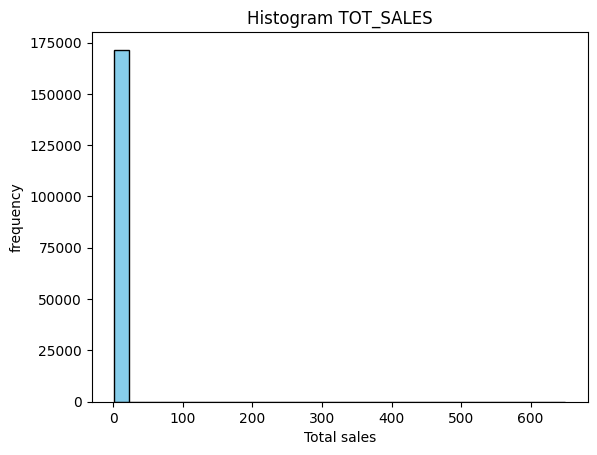

In [66]:
plt.hist(df_transaction['TOT_SALES'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram TOT_SALES")
plt.xlabel("Total sales")
plt.ylabel("frequency")
plt.show()

In [68]:
# cek outlier
outliers = df_transaction[df_transaction['TOT_SALES'] > 100]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
132180,1970-01-01 00:00:00.000043331,226,226000,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0
132181,1970-01-01 00:00:00.000043605,226,226000,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0


In [69]:
outliers_2 = df_transaction[df_transaction['PROD_QTY'] > 50]
outliers_2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
132180,1970-01-01 00:00:00.000043331,226,226000,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0
132181,1970-01-01 00:00:00.000043605,226,226000,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0


In [70]:
# Menghitung batas IQR pada kolom TOT_SALES
Q1_sales = df_transaction['TOT_SALES'].quantile(0.25)
Q3_sales = df_transaction['TOT_SALES'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

In [71]:
# Menghitung batas IQR kolom PROD_QTY
Q1_qty = df_transaction['PROD_QTY'].quantile(0.25)
Q3_qty = df_transaction['PROD_QTY'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

In [72]:
df_transaction_clean = df_transaction[
    (df_transaction['TOT_SALES'] >= lower_bound_sales) & (df_transaction['TOT_SALES'] <= upper_bound_sales)
    & (df_transaction['PROD_QTY'] >= lower_bound_qty) & (df_transaction['PROD_QTY'] <= upper_bound_qty)]

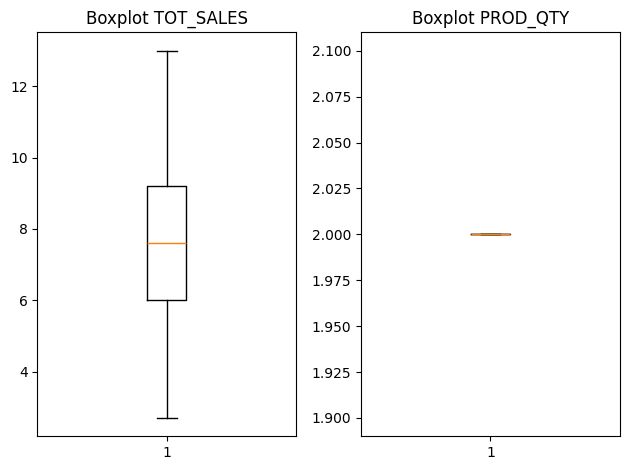

In [75]:
# Visulisasi using boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_transaction_clean['TOT_SALES'])
plt.title('Boxplot TOT_SALES')

plt.subplot(1, 2, 2)
plt.boxplot(df_transaction_clean['PROD_QTY'])
plt.title('Boxplot PROD_QTY')

plt.tight_layout()
plt.show()

In [76]:
# check missing value and duplicated
duplicated = df_transaction.duplicated().sum().sum()
missing_value = df_transaction.isnull().sum().sum()
print(f"duplicated:{duplicated}")
print(f"missing value:{missing_value}")

duplicated:1
missing value:10


In [77]:
# Handle duplicated data dan missing value
df_transaction = df_transaction.drop_duplicates()
df_transaction = df_transaction.dropna()
print(f"duplicated:{df_transaction.duplicated().sum().sum()}")
print(f"missing value:{df_transaction.isnull().sum().sum()}")

duplicated:0
missing value:0


In [78]:
df_transaction_clean.shape

(154092, 8)

In [79]:
df_transaction_clean.describe()

,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES
count,154092,154092.000000,1.540920e+05,154092.0,154092.000000
mean,1970-01-01 00:00:00.000043463,130.517379,1.304976e+05,2.0,7.673945
min,1970-01-01 00:00:00.000043282,1.000000,1.000000e+00,2.0,2.700000
25%,1970-01-01 00:00:00.000043375,64.000000,6.156375e+04,2.0,6.000000
50%,1970-01-01 00:00:00.000043463,123.000000,1.278285e+05,2.0,7.600000
75%,1970-01-01 00:00:00.000043552,199.000000,1.979972e+05,2.0,9.200000
max,1970-01-01 00:00:00.000043646,272.000000,2.415841e+06,2.0,13.000000
std,NaN,76.439626,7.796279e+04,0.0,2.212094


# **Data Behaviour**

In [80]:
df_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [81]:
df_behavior.shape

(72637, 3)

In [83]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [82]:
df_behavior.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


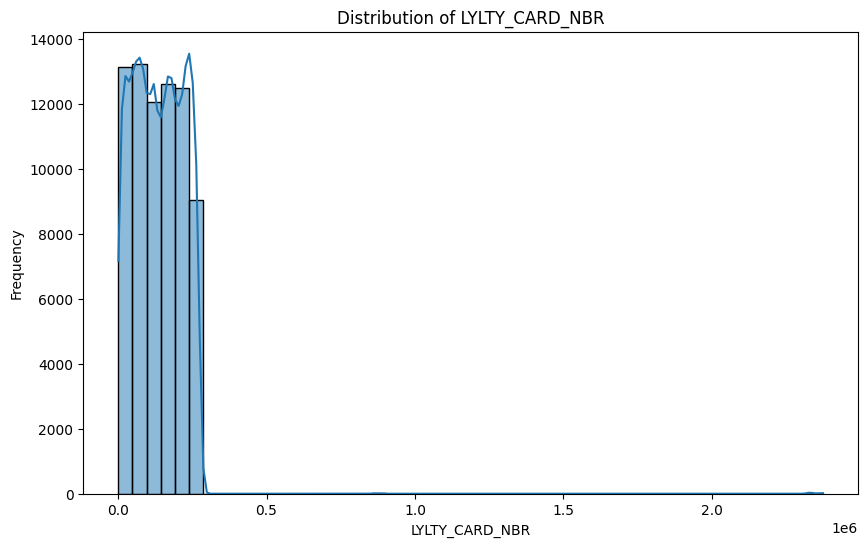

In [109]:
# Visualisasi distribusi data
plt.figure(figsize=(10,6))
sns.histplot(df_behavior['LYLTY_CARD_NBR'], bins=50, edgecolor='black', kde=True)
plt.title('Distribution of LYLTY_CARD_NBR')
plt.xlabel('LYLTY_CARD_NBR')
plt.ylabel('Frequency')
plt.show()

In [105]:
df_behavior['LYLTY_CARD_NBR'].head(10)

,LYLTY_CARD_NBR
0,1000
1,1002
2,1003
3,1004
4,1005
5,1007
6,1009
7,1010
8,1011
9,1012


In [84]:
df_behavior.describe(include='object')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


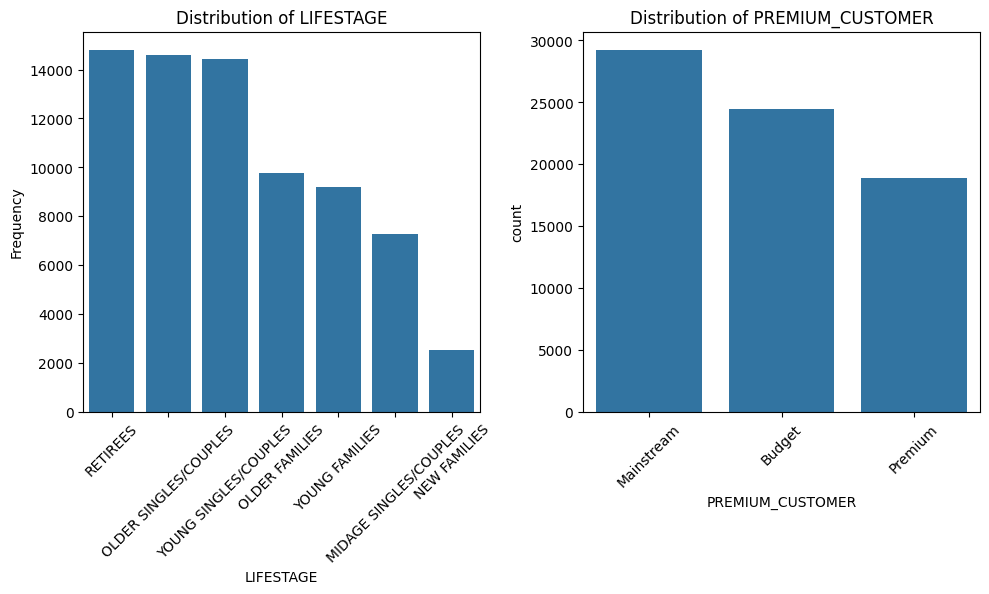

In [97]:
# visulisasi untuk type data kategori
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df_behavior, x='LIFESTAGE', order=df_behavior['LIFESTAGE'].value_counts().index)
plt.title('Distribution of LIFESTAGE')
plt.xlabel('LIFESTAGE')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(data=df_behavior, x='PREMIUM_CUSTOMER', order=df_behavior['PREMIUM_CUSTOMER'].value_counts().index)
plt.title('Distribution of PREMIUM_CUSTOMER')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [111]:
missing_value_behavior = df_behavior.isnull().sum().sum()
print(f"missing value:{missing_value_behavior}")

duplicated_behavior = df_behavior.duplicated().sum().sum()
print(f"duplicated:{duplicated_behavior}")

missing value:0
duplicated:0
